## Latent Dimensions

Import and vectorize the corpus:

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# read in the data and transform it
df = pd.read_excel('../data/reviews.xlsx', nrows=100000)
df = df[df.clean_text.isna()==False] # drop all reviews without text
documents = df.clean_text.apply(str).tolist() # make sure they are strings

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)

X = tfidf_vectorizer.fit_transform(documents)

print(X.shape)

(99973, 2444)


## Exercise 1

Create a tf-ifdf scatter plot, so that you have:
- The tf-idf on the x axis
- The idf in the y axis
- The points' size proportinal to the term frequency

For the 10 most frequent words, plot the word.



In [3]:
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words='english', 
                             analyzer='word', 
                             min_df=0.001, 
                             max_df=0.7)

X_word = vectorizer.fit_transform(documents)

word_counts = X_word.toarray()
word_tfidf = X.toarray()

df_tfidf = pd.DataFrame(data = {'word': vectorizer.get_feature_names(),
                                'tf': word_counts.sum(axis=0),
                                'idf': tfidf_vectorizer.idf_,
                                'tfidf': word_tfidf.sum(axis=0)})

df_tfidf = df_tfidf.sort_values(['tfidf', 'tf', 'idf'])

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

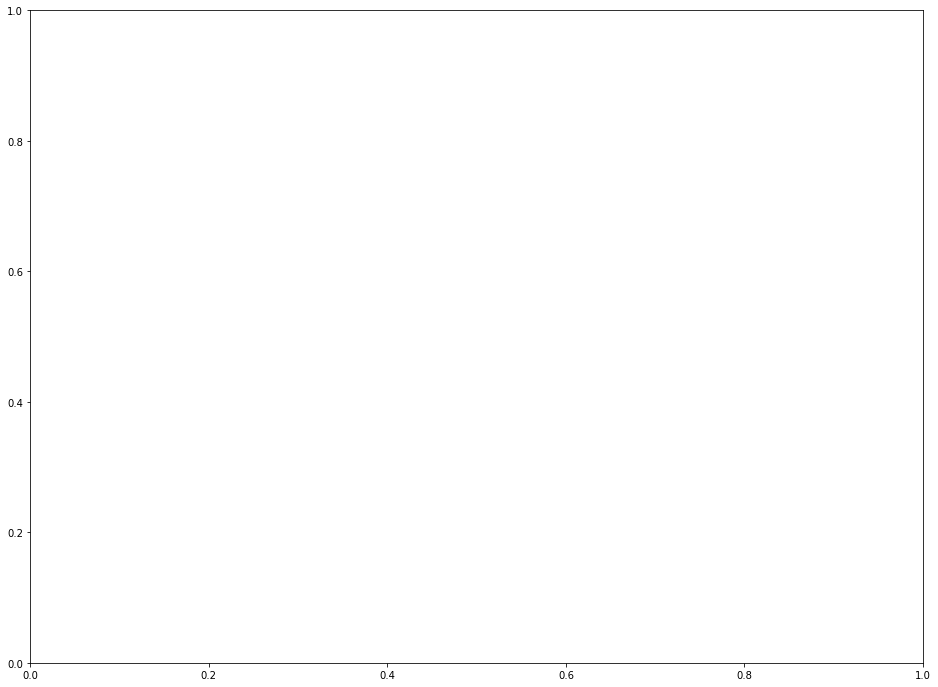

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,12))

df_tfidf['tf'] /= 10  #To lower the diameter of the circles

df_tfidf.plot.scatter(x = 'tfidf', y = 'idf', s = 'tf', ax=ax, #note: s is size
                      alpha = 0.3,
                      edgecolor = 'k' #give it some borders
                      )

## Exercise 2

Apply SVD twice, with 2 and 3 components respectively, measuring the computation time

In [ ]:
# your code here


## Exercise 3

Select a random sample of 200 instances from each data set.

For reproducibility, set a random seed for your sample.

In [ ]:
# your code here


Remember the `plot_vectors` function:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

sb.set_context('notebook')

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('spring') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.4, 
                       s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.4, 
                       s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.show()
    
categories = df.category.values[sample_idxs]

plot_vectors(X_SVD2_sample, title='SVD', labels=categories, dimensions=X_SVD2_sample.shape[1])
plot_vectors(X_SVD3_sample, title='SVD', labels=categories, dimensions=X_SVD3_sample.shape[1])


## Exercise 4

Improve `plot_vectors` by adding a legend for the categories in the upper left corner and the document index near the points

In [ ]:
# your code here

